# Лабораторная работа № 4

### Импортирование библиотек:

In [1]:
import os
import warnings
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from scipy.interpolate import interp1d
warnings.filterwarnings('ignore')

### Считывание данные из файла:

In [3]:
data = pd.read_csv('/Users/daria/Documents/Бауманка предметы/2 курс/3 семестр/ЯПП/Python/laba_4/tests/russian_demography.csv')

### Проверка на валидность файла:

In [4]:
def check_file(file_path):
    if not file_path.endswith('.csv'):
        print('\nThe file has a different extension (not ".csv")!')
        return False
    elif os.path.getsize(file_path) == 0:
        print('\nThere is no data in the file; it is empty!')
        return False
    elif not os.path.exists(file_path):
        print('\nThe file does not exist!')
        return False
    return True

### Построение графика № 1:

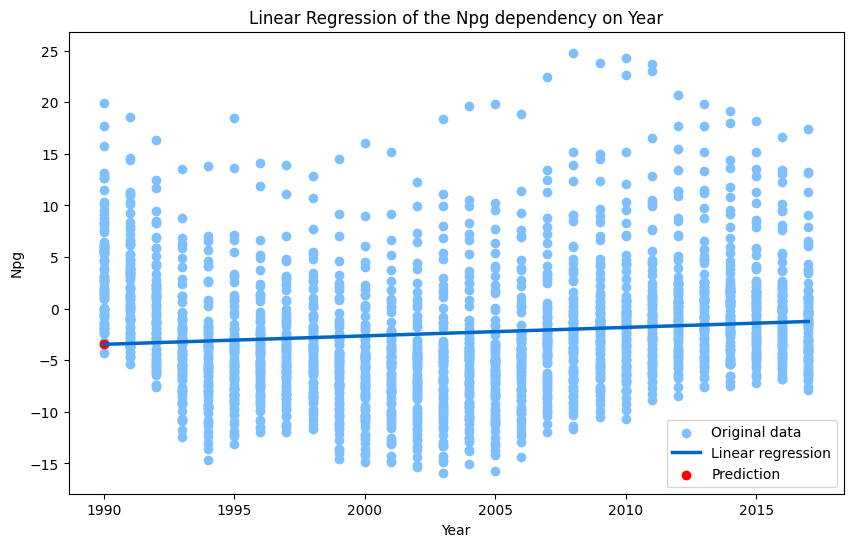

In [5]:
data = data.dropna(subset=['year', 'npg'])
x = data[['year']]
y = data['npg']
model = LinearRegression()
model.fit(x, y)
min_year = int(data['year'].min())
max_year = int(data['year'].max())
year = int(input("Enter the year (between {min_year} and {max_year}): ".format(min_year=min_year, max_year=max_year)))
prediction = model.predict([[year]])
plt.figure(figsize=(10, 6))
plt.scatter(data['year'], data['npg'], color='#7EC0FF', label='Original data')
plt.plot(data['year'], model.predict(x), color='#0067C9', linewidth=2.5, label='Linear regression')
plt.scatter(year, prediction, color='red', label='Prediction')
plt.xlabel('Year')
plt.ylabel('Npg')
plt.title('Linear Regression of the Npg dependency on Year')
plt.legend()
plt.show()

### Построение графика № 2:

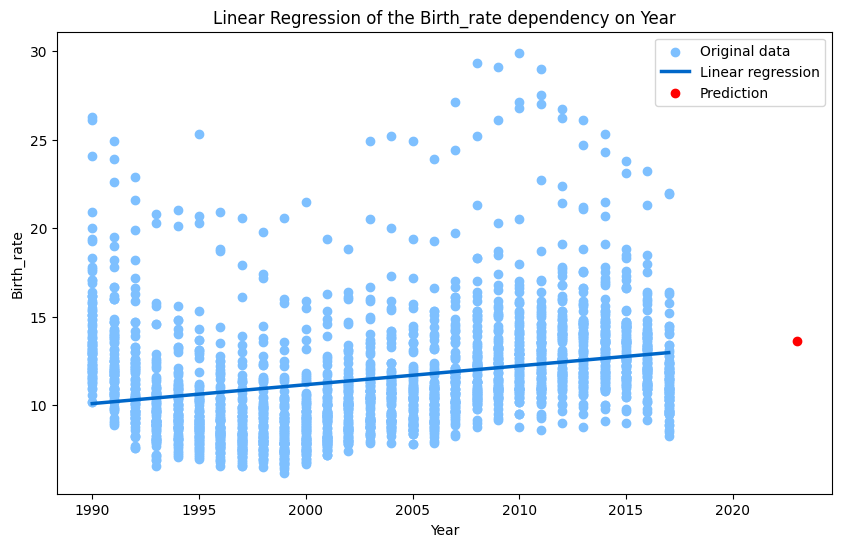

In [6]:
data = data.dropna(subset=['year', 'birth_rate'])
x = data[['year']]
y = data['birth_rate']
model = LinearRegression()
model.fit(x, y)
min_year = int(data['year'].min())
max_year = int(data['year'].max())
year = int(input("Enter the year (between {min_year} and {max_year}): ".format(min_year=min_year, max_year=max_year)))
prediction = model.predict([[year]])
plt.figure(figsize=(10, 6))
plt.scatter(data['year'], data['birth_rate'], color='#7EC0FF', label='Original data')
plt.plot(data['year'], model.predict(x), color='#0067C9', linewidth=2.5, label='Linear regression')
plt.scatter(year, prediction, color='red', label='Prediction')
plt.xlabel('Year')
plt.ylabel('Birth_rate')
plt.title('Linear Regression of the Birth_rate dependency on Year')
plt.legend()
plt.show()

### Построение графика № 3:

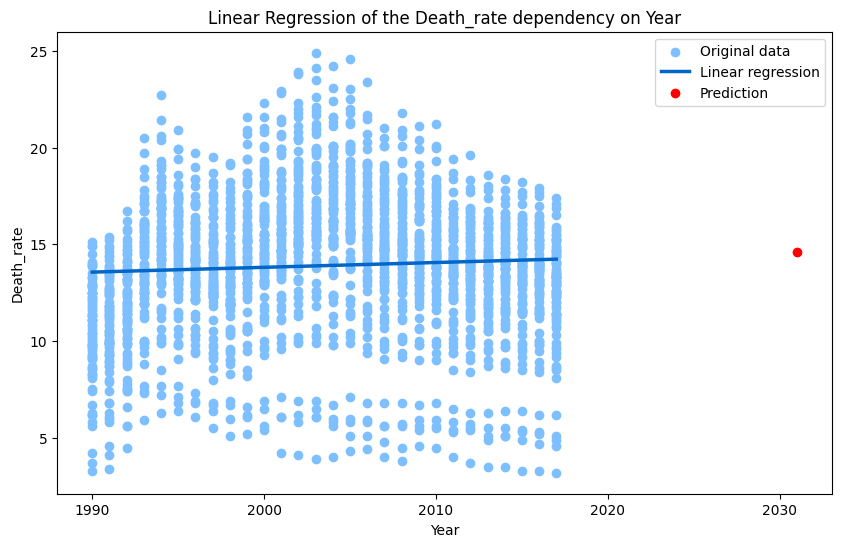

In [7]:
data = data.dropna(subset=['year', 'death_rate'])
x = data[['year']]
y = data['death_rate']
model = LinearRegression()
model.fit(x, y)
min_year = int(data['year'].min())
max_year = int(data['year'].max())
year = int(input("Enter the year (between {min_year} and {max_year}): ".format(min_year=min_year, max_year=max_year)))
prediction = model.predict([[year]])
plt.figure(figsize=(10, 6))
plt.scatter(data['year'], data['death_rate'], color='#7EC0FF', label='Original data')
plt.plot(data['year'], model.predict(x), color='#0067C9', linewidth=2.5, label='Linear regression')
plt.scatter(year, prediction, color='red', label='Prediction')
plt.xlabel('Year')
plt.ylabel('Death_rate')
plt.title('Linear Regression of the Death_rate dependency on Year')
plt.legend()
plt.show()

### Построение графика № 4:

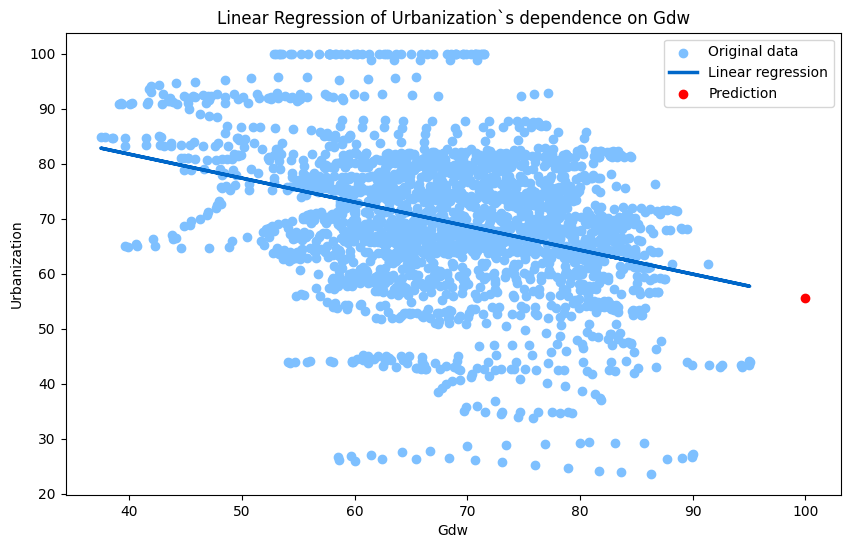

In [8]:
data = data.dropna(subset=['gdw', 'urbanization'])
x = data[['gdw']]
y = data['urbanization']
model = LinearRegression()
model.fit(x, y)
min_gdw = int(data['gdw'].min())
max_gdw = int(data['gdw'].max())
gdw = int(input("Enter the gdw (between {min_gdw} and {max_gdw}): ".format(min_gdw=min_gdw, max_gdw=max_gdw)))
prediction = model.predict([[gdw]])
plt.figure(figsize=(10, 6))
plt.scatter(data['gdw'], data['urbanization'], color='#7EC0FF', label='Original data')
plt.plot(data['gdw'], model.predict(x), color='#0067C9', linewidth=2.5, label='Linear regression')
plt.scatter(gdw, prediction, color='red', label='Prediction')
plt.xlabel('Gdw')
plt.ylabel('Urbanization')
plt.title('Linear Regression of Urbanization`s dependence on Gdw')
plt.legend()
plt.show()

## Дополнительное задание:

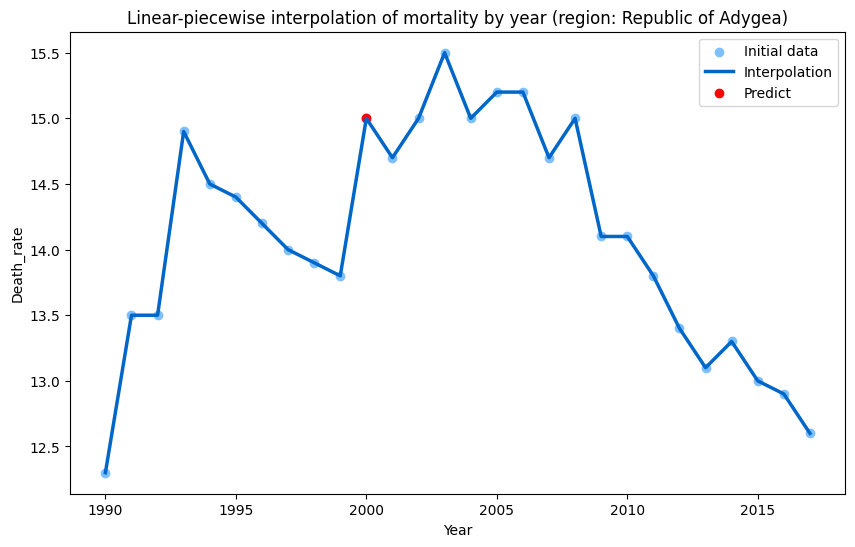

In [8]:
filtered_data = data[data['region'] == 'Republic of Adygea'].dropna(subset=['year', 'death_rate'])
x = filtered_data['year']
y = filtered_data['death_rate']

f = interp1d(x, y, kind='linear')

min_year = int(x.min())
max_year = int(x.max())
year = int(input("Введите год (от {min_year} до {max_year}): ".format(min_year=min_year, max_year=max_year)))

if year > max_year:
    raise ValueError("The entered year is greater than the maximum value!")

plt.figure(figsize=(10, 6))
plt.scatter(x, y, color='#7EC0FF', label='Initial data')
plt.plot(x, f(x), color='#0067C9', linewidth=2.5, label='Interpolation')
plt.scatter(year, f(year), color='red', label='Predict')
plt.xlabel('Year')
plt.ylabel('Death_rate')
plt.title('Linear-piecewise interpolation of mortality by year (region: Republic of Adygea)')
plt.legend()
plt.show()